Importing dependencies

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Loading the dataset

In [20]:
file_path = "C://Users//subha//Downloads//archive (3)//spam.csv"
df = pd.read_csv(file_path, encoding='latin-1')

In [21]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [22]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [23]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [24]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
X = df['v2']
y = df['v1']

Test train splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creating data pipeline

In [25]:

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),      
    ('classifier', MultinomialNB())     
]

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Training the Naive Bayes model

In [ ]:
pipeline.fit(X_train, y_train)

Prediction and results

In [33]:
y_pred = pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9623318385650225

Confusion Matrix:
[[965   0]
 [ 42 108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



0-> ham
1-> spam

Confusion Matrix

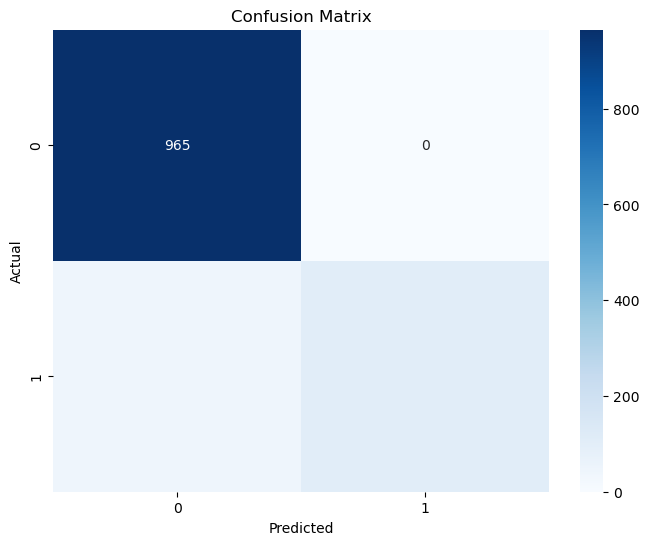

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()